In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import np_utils
from scipy.io import loadmat 

In [24]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [25]:
train_data_set = loadmat('./train_32x32.mat')
test_data_set = loadmat('./test_32x32.mat')

In [26]:
image_size = 32
num_labels = 10
num_channels = 3

X_train = train_data_set['X']
y_train = train_data_set['y']
X_test = test_data_set['X']
y_test = test_data_set['y']

In [27]:
# X_train1 = X_train.reshape(X_train.shape[3], -1)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

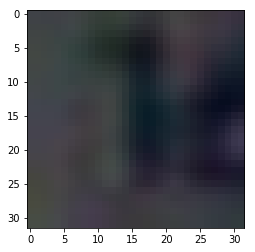

label 1


In [28]:
# check image
plt.imshow(X_train[30000])
plt.show()
print("label {}".format(y_train[30000].squeeze()))

In [29]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
X_train, y_train = randomize(X_train, y_train)
X_test, y_test = randomize(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73257, 32, 32, 3) (73257, 1)
(26032, 32, 32, 3) (26032, 1)


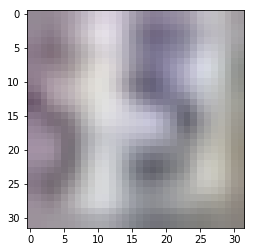

label 5


In [30]:
# check image
plt.imshow(X_train[20000])
plt.show()
print("label {}".format(y_train[20000].squeeze()))

In [31]:
# normalize

X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')

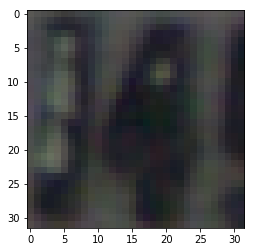

label 4


In [32]:
# check image
plt.imshow(X_train[1])
plt.show()
print("label {}".format(y_train[1].squeeze()))

In [33]:
# one_hot coding labels

y_train[np.where(y_train == 10)] = 0
y_test[np.where(y_test == 10)] = 0
max(y_test)
# y_test[1:100]

y_train = np_utils.to_categorical(y_train, num_labels)
y_test = np_utils.to_categorical(y_test, num_labels)

print(y_train.shape)
print(y_test.shape)

(73257, 10)
(26032, 10)


In [34]:
np.where(y_train == 10)

(array([], dtype=int64), array([], dtype=int64))

In [35]:
# create valid_data_set
valid_dataset = X_train[65000:].astype('float32')
train_dataset = X_train[:65000].astype('float32')
test_dataset = X_test.astype('float32')

train_labels = y_train[:65000]
valid_labels = y_train[65000:]
test_labels =  y_test

print(valid_dataset.shape, train_dataset.shape, test_dataset.shape)
print(valid_labels.shape, train_labels.shape, test_labels.shape)

(8257, 32, 32, 3) (65000, 32, 32, 3) (26032, 32, 32, 3)
(8257, 10) (65000, 10) (26032, 10)


In [36]:
# grayscale
def rgb2gray(dataset):
    nex_matrix = np.zeros([dataset.shape[0], dataset.shape[1], dataset.shape[2]])
    for i in range(dataset.shape[0]):
        r, g, b = dataset[i,:,:,0], dataset[i,:,:,1], dataset[i, :,:,2]
        nex_matrix[i] = 0.2989 * r + 0.5870 * g + 0.1140 * b
    nex_matrix = nex_matrix[:, :, :, np.newaxis].astype('float32')
    return nex_matrix

train_dataset = rgb2gray(train_dataset)
valid_dataset = rgb2gray(valid_dataset)
test_dataset = rgb2gray(test_dataset)
print(valid_dataset.shape, train_dataset.shape, test_dataset.shape)
num_channels = 1

(8257, 32, 32, 1) (65000, 32, 32, 1) (26032, 32, 32, 1)


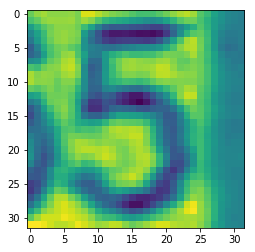

label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
# check image
import matplotlib.cm as cm

plt.imshow(train_dataset[31000].reshape(train_dataset.shape[1], train_dataset.shape[2]))
plt.show()

print("label {}".format(train_labels[31000].squeeze()))

In [39]:
# in line
train_dataset = train_dataset.reshape(train_dataset.shape[0], -1)
valid_dataset = valid_dataset.reshape(valid_dataset.shape[0], -1)
test_dataset = test_dataset.reshape(test_dataset.shape[0], -1)
print(valid_dataset.shape, train_dataset.shape, test_dataset.shape)

(8257, 1024) (65000, 1024) (26032, 1024)


In [59]:
# many_layers

batch_size = 512
hidden_units_1 = 1024
hidden_units_2 = 512
hidden_units_3 = 128
# hidden_units_4 = 256
# hidden_units_5 = 256
# hidden_units_6 = 128
lambd = 0.001

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_units_1]))
    biases1 = tf.Variable(tf.zeros([hidden_units_1]))
    
    weights2 = tf.Variable(tf.truncated_normal([hidden_units_1, hidden_units_2]))
    biases2 = tf.Variable(tf.zeros([hidden_units_2]))
    
    weights3 = tf.Variable(
    tf.truncated_normal([hidden_units_2, hidden_units_3]))
    biases3 = tf.Variable(tf.zeros([hidden_units_3]))
    
    weights4 = tf.Variable(tf.truncated_normal([hidden_units_3, num_labels]))
    biases4 = tf.Variable(tf.zeros([num_labels]))
    
#     weights5 = tf.Variable(
#     tf.truncated_normal([hidden_units_4, hidden_units_5]))
#     biases5 = tf.Variable(tf.zeros([hidden_units_5]))
    
#     weights6 = tf.Variable(tf.truncated_normal([hidden_units_5, hidden_units_6]))
#     biases6 = tf.Variable(tf.zeros([hidden_units_6]))
    
#     weights7 = tf.Variable(tf.truncated_normal([hidden_units_6, num_labels]))
#     biases7 = tf.Variable(tf.zeros([num_labels]))
    
    keep_prob = tf.placeholder(tf.float32)
    
      
    parametrs = {'weights1': weights1,
                 'weights2': weights2, 
                 'weights3': weights3,
                 'weights4': weights4,
                 'biases1': biases1,
                 'biases2': biases2,
                 'biases3': biases3,
                 'biases4': biases4}

    # Training computation.

    def forward_propagation(tf_dataset, keep_prob, parametrs):
      fist_level = tf.nn.relu(tf.add(tf.matmul(tf_dataset, parametrs['weights1']), parametrs['biases1']))
      drop_out = tf.nn.dropout(fist_level, keep_prob)
      second_level = tf.nn.relu(tf.add(tf.matmul(drop_out, parametrs['weights2']), parametrs['biases2']))
      drop_out = tf.nn.dropout(second_level, keep_prob)
      third_level = tf.nn.sigmoid(tf.add(tf.matmul(drop_out, parametrs['weights3']), parametrs['biases3']))
      drop_out = tf.nn.dropout(third_level, keep_prob)
#       fourth_level = tf.nn.sigmoid(tf.add(tf.matmul(drop_out, parametrs['weights4']), parametrs['biases4']))
#       drop_out = tf.nn.dropout(fourth_level, keep_prob)
#       fifth_level = tf.nn.sigmoid(tf.add(tf.matmul(drop_out, parametrs['weights5']), parametrs['biases5']))
#       drop_out = tf.nn.dropout(fifth_level, keep_prob)
#       six_level = tf.nn.sigmoid(tf.add(tf.matmul(drop_out, parametrs['weights6']), parametrs['biases6']))
      out = tf.add(tf.matmul(drop_out, parametrs['weights4']), parametrs['biases4'])
      return out

    logits = forward_propagation(tf_train_dataset, keep_prob, parametrs)

    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_train_labels, logits=logits))

    # Loss function using L2 Regularization
    regularizer = tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3) + tf.nn.l2_loss(weights4)
    
    loss = tf.reduce_mean(loss + lambd * regularizer)

    # Optimizer.
    # Decaying learning rate
    global_step = tf.Variable(0)  # count the number of steps taken.
    start_learning_rate = 0.6
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 5000, 0.8)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

#     optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

#     optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(forward_propagation(tf_valid_dataset, 1, parametrs))
    test_prediction = tf.nn.softmax(forward_propagation(tf_test_dataset, 1, parametrs))

In [61]:
num_steps = 100001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 0.8}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 649.495300
Minibatch accuracy: 10.0%
Validation accuracy: 12.3%
Minibatch loss at step 500: 359.745178
Minibatch accuracy: 13.3%
Validation accuracy: 6.2%
Minibatch loss at step 1000: 201.241104
Minibatch accuracy: 18.9%
Validation accuracy: 10.5%
Minibatch loss at step 1500: 114.600716
Minibatch accuracy: 19.7%
Validation accuracy: 12.1%
Minibatch loss at step 2000: 66.494911
Minibatch accuracy: 19.5%
Validation accuracy: 7.5%
Minibatch loss at step 2500: 39.541088
Minibatch accuracy: 16.0%
Validation accuracy: 18.6%
Minibatch loss at step 3000: 24.639050
Minibatch accuracy: 15.0%
Validation accuracy: 12.1%
Minibatch loss at step 3500: 15.511938
Minibatch accuracy: 17.0%
Validation accuracy: 7.5%
Minibatch loss at step 4000: 10.258774
Minibatch accuracy: 18.8%
Validation accuracy: 12.1%
Minibatch loss at step 4500: 7.105705
Minibatch accuracy: 15.4%
Validation accuracy: 18.6%
Minibatch loss at step 5000: 5.152337
Minibatch accuracy: 20.5%
Validati

Validation accuracy: 85.0%
Minibatch loss at step 45000: 0.871774
Minibatch accuracy: 84.4%
Validation accuracy: 84.0%
Minibatch loss at step 45500: 1.000643
Minibatch accuracy: 79.3%
Validation accuracy: 84.2%
Minibatch loss at step 46000: 0.965491
Minibatch accuracy: 81.6%
Validation accuracy: 82.7%
Minibatch loss at step 46500: 0.929517
Minibatch accuracy: 82.8%
Validation accuracy: 84.3%
Minibatch loss at step 47000: 0.871889
Minibatch accuracy: 83.4%
Validation accuracy: 84.4%
Minibatch loss at step 47500: 0.885884
Minibatch accuracy: 82.8%
Validation accuracy: 84.4%
Minibatch loss at step 48000: 0.973257
Minibatch accuracy: 79.7%
Validation accuracy: 83.6%
Minibatch loss at step 48500: 0.883212
Minibatch accuracy: 82.8%
Validation accuracy: 85.3%
Minibatch loss at step 49000: 0.914891
Minibatch accuracy: 83.2%
Validation accuracy: 84.8%
Minibatch loss at step 49500: 0.949628
Minibatch accuracy: 80.7%
Validation accuracy: 85.2%
Minibatch loss at step 50000: 0.914144
Minibatch accu

Minibatch loss at step 89500: 0.827114
Minibatch accuracy: 84.8%
Validation accuracy: 86.8%
Minibatch loss at step 90000: 0.856255
Minibatch accuracy: 82.2%
Validation accuracy: 87.1%
Minibatch loss at step 90500: 0.803959
Minibatch accuracy: 86.1%
Validation accuracy: 87.0%
Minibatch loss at step 91000: 0.809474
Minibatch accuracy: 86.5%
Validation accuracy: 86.9%
Minibatch loss at step 91500: 0.886683
Minibatch accuracy: 83.0%
Validation accuracy: 86.9%
Minibatch loss at step 92000: 0.822374
Minibatch accuracy: 85.7%
Validation accuracy: 86.9%
Minibatch loss at step 92500: 0.807177
Minibatch accuracy: 85.4%
Validation accuracy: 86.9%
Minibatch loss at step 93000: 0.851129
Minibatch accuracy: 83.4%
Validation accuracy: 86.9%
Minibatch loss at step 93500: 0.828013
Minibatch accuracy: 84.0%
Validation accuracy: 86.8%
Minibatch loss at step 94000: 0.831221
Minibatch accuracy: 85.2%
Validation accuracy: 86.8%
Minibatch loss at step 94500: 0.742679
Minibatch accuracy: 88.3%
Validation accu

In [15]:
# CNN
batch_size = 64
patch_size = 3
depth_1 = 16
depth_2 = 16
depth_3 = 16
depth_4 = 32
num_hidden = 64


graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth_1], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth_1]))

    layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth_1, depth_2], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth_2]))

    layer3_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth_2, depth_3], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[depth_3])) 
    
    layer4_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth_3, depth_4], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[depth_4]))  
    
    layer5_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth_4, num_hidden], stddev=0.1))
    layer5_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))

    layer6_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
    layer6_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
    def model(data):
        conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
        hidden = tf.nn.relu(tf.add(conv, layer1_biases))
        
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 1, 1, 1], padding='SAME')
        max_pol = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        hidden = tf.nn.relu(tf.add(max_pol, layer2_biases))
        

        conv = tf.nn.conv2d(hidden, layer3_weights, [1, 1, 1, 1], padding='SAME')
        hidden = tf.nn.relu(tf.add(conv, layer3_biases))
        
        conv = tf.nn.conv2d(hidden, layer4_weights, [1, 1, 1, 1], padding='SAME')
        max_pol = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        hidden = tf.nn.relu(tf.add(max_pol, layer4_biases))
        
        shape = hidden.get_shape().as_list()
        
        print(shape[1], shape[2], shape[3])
        
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.add(tf.matmul(reshape, layer5_weights), layer5_biases))
        return tf.add(tf.matmul(hidden, layer6_weights), layer6_biases)

    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
    #   optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#     global_step = tf.Variable(0)  # count the number of steps taken.
#     start_learning_rate = 0.1
#     learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100, 0.98)
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))


8 8 32
8 8 32
8 8 32


In [16]:
num_steps = 10001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 9.941973
Minibatch accuracy: 12.5%
Validation accuracy: 19.2%
Minibatch loss at step 50: 2.254923
Minibatch accuracy: 17.2%
Validation accuracy: 19.2%
Minibatch loss at step 100: 2.220489
Minibatch accuracy: 23.4%
Validation accuracy: 19.2%
Minibatch loss at step 150: 2.254634
Minibatch accuracy: 18.8%
Validation accuracy: 19.2%
Minibatch loss at step 200: 2.189073
Minibatch accuracy: 21.9%
Validation accuracy: 19.2%
Minibatch loss at step 250: 2.195249
Minibatch accuracy: 23.4%
Validation accuracy: 19.2%
Minibatch loss at step 300: 2.230347
Minibatch accuracy: 23.4%
Validation accuracy: 19.2%
Minibatch loss at step 350: 2.242455
Minibatch accuracy: 25.0%
Validation accuracy: 19.2%
Minibatch loss at step 400: 2.237279
Minibatch accuracy: 15.6%
Validation accuracy: 19.2%
Minibatch loss at step 450: 2.131022
Minibatch accuracy: 26.6%
Validation accuracy: 19.2%


KeyboardInterrupt: 

In [57]:
# layers

batch_size = 1024
hidden_units_1 = 1024
hidden_units_2 = 128
lambd = 0.001

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_units_1]))
    biases1 = tf.Variable(tf.zeros([hidden_units_1]))
    
    weights2 = tf.Variable(tf.truncated_normal([hidden_units_1, hidden_units_2]))
    biases2 = tf.Variable(tf.zeros([hidden_units_2]))
    
    weights3 = tf.Variable(
    tf.truncated_normal([hidden_units_2, num_labels]))
    biases3 = tf.Variable(tf.zeros([num_labels]))
    
    
    keep_prob = tf.placeholder(tf.float32)
    
      
    parametrs = {'weights1': weights1,
                 'weights2': weights2, 
                 'weights3': weights3,
                 'biases1': biases1,
                 'biases2': biases2,
                 'biases3': biases3}

    # Training computation.

    def forward_propagation(tf_dataset, keep_prob, parametrs):
      fist_level = tf.nn.relu(tf.add(tf.matmul(tf_dataset, parametrs['weights1']), parametrs['biases1']))
      drop_out = tf.nn.dropout(fist_level, keep_prob)
      second_level = tf.nn.relu(tf.add(tf.matmul(drop_out, parametrs['weights2']), parametrs['biases2']))
      drop_out = tf.nn.dropout(second_level, keep_prob)
      out = tf.add(tf.matmul(drop_out, parametrs['weights3']), parametrs['biases3'])
      return out

    logits = forward_propagation(tf_train_dataset, keep_prob, parametrs)

    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_train_labels, logits=logits))

    # Loss function using L2 Regularization
    regularizer = tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3)
    
    loss = tf.reduce_mean(loss + lambd * regularizer)

    # Optimizer.
    # Decaying learning rate
#     global_step = tf.Variable(0)  # count the number of steps taken.
#     start_learning_rate = 0.6
#     learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 50000, 0.85)
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

#     optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(forward_propagation(tf_valid_dataset, 1, parametrs))
    test_prediction = tf.nn.softmax(forward_propagation(tf_test_dataset, 1, parametrs))

In [58]:
num_steps = 10001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 1}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 3920.625488
Minibatch accuracy: 7.2%
Validation accuracy: 9.5%
Minibatch loss at step 500: 481.748169
Minibatch accuracy: 42.1%
Validation accuracy: 39.9%
Minibatch loss at step 1000: 427.888763
Minibatch accuracy: 52.5%
Validation accuracy: 50.7%
Minibatch loss at step 1500: 403.416687
Minibatch accuracy: 55.9%
Validation accuracy: 53.2%
Minibatch loss at step 2000: 381.537720
Minibatch accuracy: 60.7%
Validation accuracy: 57.9%
Minibatch loss at step 2500: 370.671326
Minibatch accuracy: 61.8%
Validation accuracy: 59.5%
Minibatch loss at step 3000: 365.077026
Minibatch accuracy: 57.8%
Validation accuracy: 55.9%
Minibatch loss at step 3500: 345.178253
Minibatch accuracy: 68.4%
Validation accuracy: 64.2%
Minibatch loss at step 4000: 428.325073
Minibatch accuracy: 37.1%
Validation accuracy: 50.5%
Minibatch loss at step 4500: 325.672089
Minibatch accuracy: 71.9%
Validation accuracy: 67.2%
Minibatch loss at step 5000: 318.657104
Minibatch accuracy: 72.

KeyboardInterrupt: 